# 1. Ask an interesting question

1. Delay binary classifier (yes/no, >15 min)
- Better isolate the key features to predict delays so that airlines focus their efforts on their weakest points
- Account for uncontrollable variables (e.g. unpredicted adverse weather) and prepare to act consequently
2. Additional questions:
- When is the best time of day/day of week/time of year to fly to minimize delays?
- Do older planes suffer more delays?
- How does the number of people flying between different locations change over time?
- How well does weather predict plane delays?
- Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?

___

In [1]:
# Import libraries to be used

# Warning messages display
## import warnings
## warnings.filterwarnings(action='ignore') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
## pd.set_option('display.max_rows', None) # It greatly slows down the output display and freezes the kernel

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
t0 = time.perf_counter() 

In [3]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

In [4]:
output_csv_path = os.path.join(root,
                               "Output_Data",
                               "US_DoT",
                               "AL_OTP_MVP_Preprocessed.csv")
output_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT\\AL_OTP_MVP_Preprocessed.csv'

In [5]:
%%time

df0 = pd.read_csv(output_csv_path,
                  encoding='latin1',
#                   nrows=10000,
#                   usecols=cols[:-1], # This way, the extra column is disregarded for the loading process
                  low_memory = False)

Wall time: 2.77 s


Algorithms that **do not require normalization/scaling** are the ones that **rely on rules**. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are:
- All the tree-based algorithms — **CART, Random Forests, Gradient Boosted Decision Trees** → These algorithms utilize rules (series of inequalities) and do not require normalization.
- Algorithms like **Linear Discriminant Analysis(LDA)** → Naive Bayes is by design equipped to handle this and give weights to the features accordingly. Performing features scaling in these algorithms may not have much effect.

Few key points to note:
- Mean centering does not affect the covariance matrix
- Scaling of variables does affect the covariance matrix
- Standardizing affects the covariance

Ways to do Feature Scaling:
- Min Max Scaler
    - We can set the range like [0,1] or [0,5] or [-1,1].
    - This Scaler responds well if the standard deviation is small and when a distribution is **not Gaussian**. This Scaler is **sensitive to outliers**.
- Standard Scaler
    - The Standard Scaler assumes data is **normally distributed** within each feature and scales them such that the distribution **centered around 0**, with a **standard deviation of 1**.
    - If data is not normally distributed, this is not the best Scaler to use.
- Max Abs Scaler
    - Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the **maximal absolute value of each feature in the training set is 1.0**. It does not shift/center the data and thus does not destroy any **sparsity**.
    - On positive-only data, this Scaler behaves similarly to Min Max Scaler.
- Robust Scaler
    - **Robust to outliers**
- Quantile Transformer Scaler
- Power Transformer Scaler
- Unit Vector Scaler

In [6]:
X = df0.drop('ARR_DELAY', axis=1).head(10000)
X

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,TAXI_OUT,TAXI_IN,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY,DIV_DISTANCE
0,2019,1,1,3,4,25.0,25.0,1.0,30.0,4.0,25.0,1.0,0.0,0,0.0,36.0,1.0,152.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0
1,2019,1,1,4,5,70.0,70.0,1.0,35.0,9.0,82.0,1.0,0.0,0,0.0,38.0,1.0,152.0,0.0,0.0,12.0,0.0,70.0,0.0,0.0
2,2019,1,1,5,6,6.0,6.0,0.0,20.0,3.0,0.0,0.0,0.0,0,0.0,84.0,1.0,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,1,1,6,7,-5.0,0.0,0.0,16.0,3.0,0.0,0.0,0.0,0,0.0,85.0,1.0,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,1,1,7,1,-3.0,0.0,0.0,25.0,4.0,0.0,0.0,0.0,0,0.0,88.0,1.0,563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019,1,1,14,1,4.0,4.0,0.0,14.0,5.0,0.0,0.0,0.0,0,0.0,44.0,1.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,2019,1,1,14,1,-1.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0,0.0,72.0,1.0,371.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,2019,1,1,14,1,10.0,10.0,0.0,24.0,5.0,0.0,0.0,0.0,0,0.0,55.0,1.0,371.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,2019,1,1,14,1,-5.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,0,0.0,71.0,1.0,371.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y = df0['ARR_DELAY'].head(10000)
y

0       25.0
1       82.0
2       -8.0
3      -24.0
4       -9.0
        ... 
9995    -3.0
9996    -6.0
9997    -6.0
9998    -9.0
9999   -11.0
Name: ARR_DELAY, Length: 10000, dtype: float64

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='ARR_DELAY'>

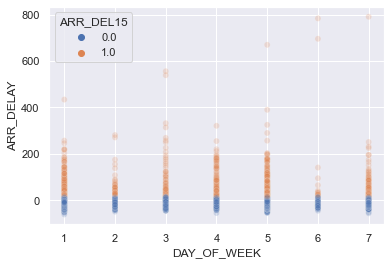

In [8]:
sns.scatterplot(x=X.columns[4],
                y=y,
                data=df0,
                hue='ARR_DEL15',
                alpha=0.2)

(-50.0, 100.0)

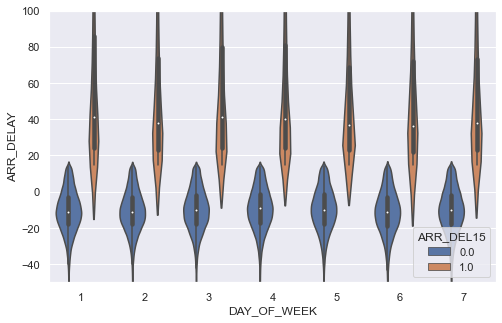

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
sns.violinplot(x=X.columns[4],
                y=y.name,
                data=df0,
                hue='ARR_DEL15',
                ax=ax)

ax.set_ylim(-50, 100)

In [10]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
%load_ext memory_profiler

In [12]:
%memit

peak memory: 385.52 MiB, increment: 0.02 MiB


In [13]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = make_pipeline(LinearRegression())
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe = make_pipeline(RandomForestRegressor())

pipe.fit(X_train, y_train)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])

Wall time: 23 ms


Pipeline(steps=[('linearregression', LinearRegression())])

In [14]:
# LinearRegression
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9447208470693848

In [15]:
results = pd.DataFrame({'y_test' : y_test,
                        'predictions' : pipe.predict(X_test)})
results

,y_test,predictions
6252,-24.0,-13.579857
4684,-19.0,-15.088504
1731,-29.0,-18.010286
4742,-8.0,-8.877965
4521,2.0,-12.669203
...,...,...
4862,-24.0,-19.071383
7025,-16.0,-10.460830
7647,-15.0,-13.190531
7161,-11.0,-11.441551


In [16]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = make_pipeline(LinearRegression())
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe = make_pipeline(RandomForestRegressor())

pipe.fit(X_train, y_train)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])

Wall time: 18 ms


Pipeline(steps=[('linearregression', LinearRegression())])

In [17]:
# StandardScaler(), LinearRegression()
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9447208470693848

In [18]:
results = pd.DataFrame({'y_test' : y_test,
                        'predictions' : pipe.predict(X_test)})
results

,y_test,predictions
6252,-24.0,-13.579857
4684,-19.0,-15.088504
1731,-29.0,-18.010286
4742,-8.0,-8.877965
4521,2.0,-12.669203
...,...,...
4862,-24.0,-19.071383
7025,-16.0,-10.460830
7647,-15.0,-13.190531
7161,-11.0,-11.441551


In [19]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = make_pipeline(LinearRegression())
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe = make_pipeline(RandomForestRegressor())

pipe.fit(X_train, y_train)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])

Wall time: 17 ms


Pipeline(steps=[('linearregression', LinearRegression())])

In [20]:
# RandomForestRegressor()
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9447208470693848

In [21]:
results = pd.DataFrame({'y_test' : y_test,
                        'predictions' : pipe.predict(X_test)})
results

,y_test,predictions
6252,-24.0,-13.579857
4684,-19.0,-15.088504
1731,-29.0,-18.010286
4742,-8.0,-8.877965
4521,2.0,-12.669203
...,...,...
4862,-24.0,-19.071383
7025,-16.0,-10.460830
7647,-15.0,-13.190531
7161,-11.0,-11.441551


In [22]:
%memit

peak memory: 390.68 MiB, increment: 0.00 MiB


In [23]:
t1 = time.perf_counter()  - t0
print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)

Time elapsed:  26.9358881


# 5. Communicate and visualize the results

___